# Vector and Matrix Norms

The $p$-norm of a vector $(v_1,v_2,\ldots,v_n)$ has the following
definition:
$$
\| v \|_p = \left( \sum_{i} | v_i |^p \right)^{\frac{1}{p}},
$$
with the max or $\infty$ norm case given by
$$
\| v \|_\infty = \max_i |v_i|
$$.

We can define a norm on a matrix $A$ by viewing the matrix as a map from
$\mathbb{R}^m$ to $\mathbb{R}^n$.  The *operator norm*, or *induced norm* of a matrix is given by, for $p\geq 1$:
$$
\| A \|_p = \max_{\| x \|_p=1} \| Ax \|_p
$$.

We can think of this norm as representing the largest **output** in the $p$-norm of the operator applied to the vectors that make up the **unit ball** in the corresponding $p$-norm. 

```
def mat_norm(A=np.array([[1.0, .5],[-.3,2.0]]),p=2,plot=True):
    xvec=2*np.random.rand(2,1000)-1 #generate 1000 random points in [-1,-1]x[1,1]   
    xnrm=np.linalg.norm(xvec,ord=p,axis=0) #compute norms of random vectors    
    xvec=xvec/xnrm #normalize each vector, hopefully
    b=A.dot(xvec)
    Anrm=np.max(np.linalg.norm(b,ord=p,axis=0))
    if plot: #plot x-ball, A-ball
        plt.subplot(121)
        plt.scatter(xvec[0],xvec[1],s=.2) #plot x-ball
        ttl='Unit ball in '+str(p)+'-norm'
        plt.title(ttl)
        plt.subplot(122)
        plt.scatter(b[0],b[1],color='red',s=.2)  #plot A-ball in red
        ttl=str(p)+'-'+'norm of A='+str(Anrm)
        plt.title(ttl)
        ax=plt.gca()
        ax.set_aspect('equal')
        plt.show()
    return Anrm
```    


Below, we take 1000 vectors of "unit" length in the corresponding norm and plot their output; we approximate the corresponding matrix norm with this output.


/Users/Undertrick/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


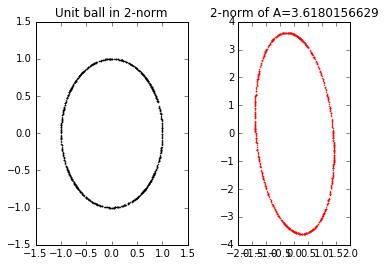

In [1]:
%matplotlib inline
from unit_ball import *
B=np.array([[1,-1],[2,3]])
nrm=mat_norm(A=B)

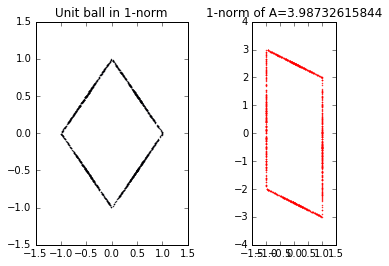

In [2]:
nrm=mat_norm(A=B,p=1)

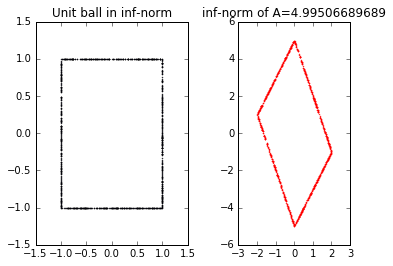

In [3]:
nrm=mat_norm(A=B,p=np.inf)

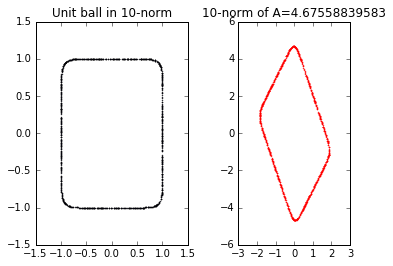

In [4]:
nrm=mat_norm(A=B,p=10)

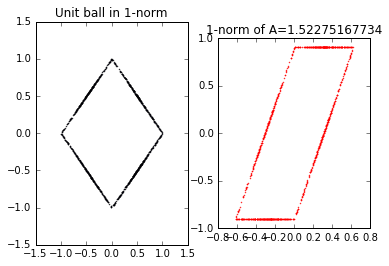

In [5]:
nrm=mat_norm(A=np.random.rand(2,2),p=1)

# Condition Number of a Matrix

The condition number of a matrix gives a **pessamistic** view of how perturbations to $A$ and $b$ effect the output $x$ from solving $Ax=b$.

```
def norm_perturb(A=np.array([[4,-1],[2,2]]),b=np.array([3,4]),eps=1E-6,samples=1000):
    x0=np.linalg.solve(A,b)
    plt.scatter(x0[0],x0[1],s=1,color='red')
    condA=np.linalg.cond(A,np.inf)    
    X=np.zeros([2,1000])
    for loop in xrange(samples):
        deltaA=eps*(2*np.random.rand(2,2)-1)
        deltab=eps*(2*np.random.rand(2)-1)
        X[:,loop]=np.linalg.solve(A+deltaA,b+deltab)
    plt.scatter(X[0],X[1],s=.2)
    plt.xlim([1-condA*eps,1+condA*eps])
    plt.ylim([1-condA*eps,1+condA*eps])
    ax=plt.gca()
    ax.set_aspect('equal')
    ax.add_patch(patches.Rectangle((x0[0]-eps,x0[1]-eps),2.0*eps,2.0*eps,fill=False,color='red'))
    plt.show()
```


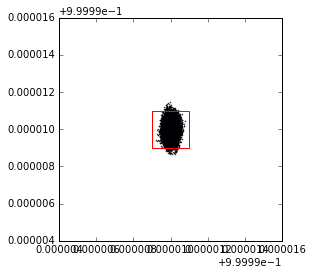

[[ 0.9999996   1.00000006  1.00000009 ...,  0.99999999  1.00000024
   1.0000001 ]
 [ 1.00000062  1.00000017  1.00000029 ...,  0.99999937  0.99999972
   1.00000022]]


In [9]:
norm_perturb()
plt.figure()

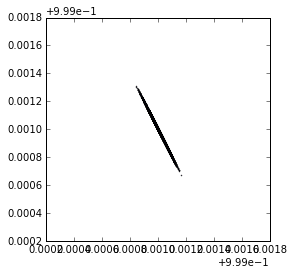

[[ 0.999912    0.99999347  0.99995101 ...,  0.99995436  1.00008726
   0.99998243]
 [ 1.00017509  1.00001274  1.00009706 ...,  1.0000911   0.99982634
   1.00003366]]


In [7]:
norm_perturb(A=np.array([[2,1],[1.99,1.01]]),b=[3,3])